<a href="https://colab.research.google.com/github/TatyanaLanceva/Netology/blob/main/5_4_A_B_tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание к занятию "A/B-тесты"

### Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex - портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание набора данных
Профессор Оук скопировал все содержимое в память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [ ]:
import warnings
# Отключение предупреждений (warnings)
warnings.filterwarnings("ignore")

import pandas as pd

from scipy.stats import ttest_ind
from scipy.stats import f_oneway, shapiro

pokemon = pd.read_csv('https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv', on_bad_lines='skip')  # Откроем датасет
pokemon.head()

# Обратите внимание, что у покемона может быть один или два класса.
# Если у покемона два класса, считается, что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False


### Задачи

<div class="alert alert-info">
<b>Задание № 1:</b>
    
Профессор Оук подозревает, что покемоны в классе `Grass` имеют более сильную обычную атаку, чем покемоны в классе `Rock`. Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>

In [ ]:
# Отфильтруем покемонов по классам 'Grass' и 'Rock' в обоих классах
grass_pokemon = pokemon[(pokemon['Class 1'] == 'Grass') | (pokemon['Class 2'] == 'Grass')]
rock_pokemon = pokemon[(pokemon['Class 1'] == 'Rock') | (pokemon['Class 2'] == 'Rock')]

# Удалим покемонов с двумя классами одновременно:
grass_pokemon = grass_pokemon[~((grass_pokemon['Class 1'] == 'Grass') & (grass_pokemon['Class 2'].notnull()))]
rock_pokemon = rock_pokemon[~((rock_pokemon['Class 1'] == 'Rock') & (rock_pokemon['Class 2'].notnull()))]

# Соберем значения атаки для каждого класса:
grass_attack = grass_pokemon['Attack']
rock_attack = rock_pokemon['Attack']

# Проверку распределений опустим, по условиям задачи есть данные, что распределение обычных атак нормальное для всех классов.
# Выполненим двухвыборочный t-тест для независимых выборок
t_statistic, p_value = ttest_ind(grass_attack, rock_attack)
print(f"t-статистика: {t_statistic}, p-значение: {p_value}")

t-статистика: -3.1844842999983785, p-значение: 0.0020757539895809533


**Выводы:**

p-значение значительно ниже уровня значимости α=0,05, что указывает на наличие статистической значимости различий между средними значениями обычной атаки покемонов классов Grass и Rock.
Н0 =  нет разницы в средней силе обычной атаки между покемонами классов "Grass" и "Rock". Следовательно мы отвергаем нулевую гипотезу и принимаем, что разница в атаке есть, но для понимания, какая, нужны дальнейшие исследования. Применим графический метод, построим boxplot.

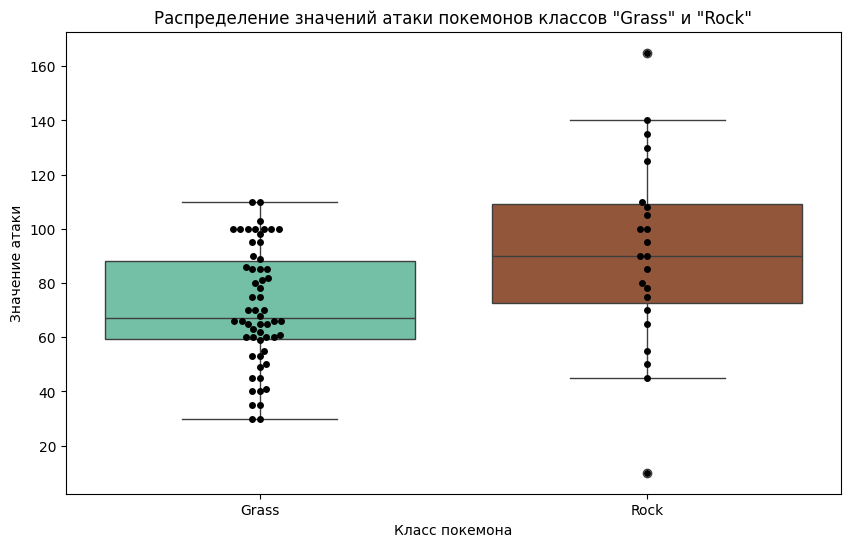

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Объединяем данные в один DataFrame для удобства построения box plots
data = {'Класс': ['Grass'] * len(grass_attack) + ['Rock'] * len(rock_attack),
        'Атака': list(grass_attack) + list(rock_attack)}
df = pd.DataFrame(data)

# Строим box plot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Класс', y='Атака', data=df, palette=['MediumAquamarine', 'Sienna'])

# Добавляем точки для отображения реальных значений
sns.swarmplot(x='Класс', y='Атака', data=df, color='black')

# Настройки графика
plt.title('Распределение значений атаки покемонов классов "Grass" и "Rock"')
plt.xlabel('Класс покемона')
plt.ylabel('Значение атаки')

plt.show()

**Выводы:**

Мы видим, что значения атаки у покемонов класса "Rock" имеют следущие отличия: максимум и медиана у покемоном находятся выше, чем у класса "Grass". Это показывает, что значительная часть покемонов "Rock" обладает более высокой силой атаки. При этом размеры ящиков близки, что указывает на схожесть распределения в разных классах.

<div class="alert alert-info">
<b>Задание № 2:</b>
    
Профессор Оук уже долго не может спать по ночам, ведь его волнует вопрос, а правда ли, что покемоны в классе `Water` в среднем быстрее, чем покемоны в классе `Normal`.
    
    
Проверьте, прав ли он, и убедите его в своём выводе статистически.
    
Примечание: если есть покемоны, которые относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.
</div>

In [ ]:
# Отфильтруем покемонов по классам 'Water' и 'Normal' в обоих классах
water_pokemon = pokemon[(pokemon['Class 1'] == 'Water') | (pokemon['Class 2'] == 'Water')]
normal_pokemon = pokemon[(pokemon['Class 1'] == 'Normal') | (pokemon['Class 2'] == 'Normal')]

# Удалим покемонов с двумя классами одновременно:
water_pokemon = water_pokemon[~((water_pokemon['Class 1'] == 'Water') & (water_pokemon['Class 2'].notnull()))]
normal_pokemon = normal_pokemon[~((normal_pokemon['Class 1'] == 'Rock') & (normal_pokemon['Class 2'].notnull()))]

# Соберем значения скорости для искомых классов:
water_speed = water_pokemon['Speed']
normal_speed = normal_pokemon['Speed']

# Проверку распределения опустим, по условиям задачи есть данные, что распределение обычных атак нормальное для всех классов.
# Выполненим двухвыборочный t-тест для независимых выборок
t_statistic, p_value = ttest_ind(water_speed, normal_speed)
print(f"t-статистика: {t_statistic}, p-значение: {p_value}")

t-статистика: -1.6647571172344386, p-значение: 0.09777126925575434


**Выводы:**

p-значение выше уровня значимости α=0,05. Это означает, что разница в средних значениях скорости между покемонами классов Water и Normal не является статистически значимой.
H0 = нет разницы в средней скорости между покемонами классов "Water" и "Normal"
Поскольку p-значение больше стандартного уровня значимости α=0,05, мы не можем отвергнуть нулевую гипотезу. Следовательно предположение о том, что покемоны класса Water в среднем быстрее, чем покемоны класса Normal, не подтверждается статистическими данными.

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрёл сыворотку, способную ускорить покемона. Однако мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своём выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill', 'Mega Alakazam',
                    'Deoxys Normal Forme', 'Mega Lopunny']

In [ ]:
# Разделим всех наших покемонов на две группы: получившие сыворотку и нет.
treated_pokemon = ['Mega Beedrill', 'Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

index_treated = pokemon['Name'].isin(treated_pokemon)
index_others = ~index_treated

df_treated = pokemon[index_treated]
df_others = pokemon[index_others]

# Проверим распределение:
stat, p = shapiro(df_treated['Speed'])
print('Статистика Шапиро-Уилка для обработанных покемонов:', stat, 'p-значение:', p)

stat, p = shapiro(df_others['Speed'])
print('Статистика Шапиро-Уилка для необработанных покемонов:', stat, 'p-значение:', p)

Статистика Шапиро-Уилка для обработанных покемонов: 0.8274266724986942 p-значение: 0.16119061463308976
Статистика Шапиро-Уилка для необработанных покемонов: 0.9848792891888268 p-значение: 2.5469674821596204e-07


Выводы по распределению:

Обработанные покемоны: p-значение равно 0,16119, что больше 0,05. Распределение скорости можно считать нормальным.
Необработанные покемоны: p-значение намного меньше 0,05. Это указывает на то, что распределение скорости для этой группы покемонов не является нормальным.

In [ ]:
# Так как распределение по необработанным покемонам не является нормальным, проверим, можно ли провести тестирование Манна-Уитни,
# для этого предварительно проверим дисперсии:

# Дисперсия для группы покемонов, принимавших сыворотку
variance_treated = df_treated['Speed'].var()
# Дисперсия для группы покемонов, не принимавших сыворотку
variance_others = df_others['Speed'].var()
print(f"Дисперсия для группы покемонов, принимавших сыворотку: {variance_treated}")
print(f"Дисперсия для группы покемонов, не принимавших сыворотку: {variance_others}")


Дисперсия для группы покемонов, принимавших сыворотку: 50.0
Дисперсия для группы покемонов, не принимавших сыворотку: 818.8059226952378


**Выводы:**

Дисперсии различаются значительно. У нас получается большой разброс скоростей. Тест Манна-Уитни не подходит при такой разнице дисперсий. Обратимся к тесту Колмогорова-Смирнова

In [ ]:
from scipy.stats import ks_2samp
ks_stat, p_ks = ks_2samp(df_treated['Speed'], df_others['Speed'])
print("KS-статистика:", ks_stat, "p-значение:", p_ks)

KS-статистика: 0.9886934673366834 p-значение: 8.442076826937149e-08


**Выводы**:

 крайне низкое p-значение указывает на то, что распределения скоростей покемонов, принимавших сыворотку, и покемонов, которые сыворотку не получали, значительно различаются. Сыворотка действительно оказала существенное влияние на скорость покемонов.

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако профессор не очень уверен, что они лучше остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов?

А произведение этих же параметров?

Найдите ответы на эти вопросы и убедите всех в своём выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
# Создадим новые колонки для суммы и произведения характеристик
pokemon['sum_had'] = pokemon['HP'] + pokemon['Attack'] + pokemon['Defense']
pokemon['prod_had'] = pokemon['HP'] * pokemon['Attack'] * pokemon['Defense']

# Разделим покемонов на легендарных и нелегендарных
legendary_mask = pokemon['Legendary'] == True
non_legendary_mask = pokemon['Legendary'] == False

legendary_pokemon = pokemon[legendary_mask]
non_legendary_pokemon = pokemon[non_legendary_mask]

# Проверим нормальность распределения сумм и произведений характеристик
shapiro_sum_legendary, pvalue_shapiro_sum_legendary = shapiro(legendary_pokemon['sum_had'])
shapiro_prod_legendary, pvalue_shapiro_prod_legendary = shapiro(legendary_pokemon['prod_had'])

shapiro_sum_non_legendary, pvalue_shapiro_sum_non_legendary = shapiro(non_legendary_pokemon['sum_had'])
shapiro_prod_non_legendary, pvalue_shapiro_prod_non_legendary = shapiro(non_legendary_pokemon['prod_had'])

# Применение t-теста для сумм характеристик
ttest_sum_result = ttest_ind(legendary_pokemon['sum_had'], non_legendary_pokemon['sum_had'])

# Применение t-теста для произведений характеристик
ttest_prod_result = ttest_ind(legendary_pokemon['prod_had'], non_legendary_pokemon['prod_had'])

# Вывод результатов
print("Проверка нормальности распределения:")
print(f"Шапиро-Уилк для суммы характеристик легендарных покемонов: {shapiro_sum_legendary:.4f}, p-значение: {pvalue_shapiro_sum_legendary:.4f}")
print(f"Шапиро-Уилк для произведения характеристик легендарных покемонов: {shapiro_prod_legendary:.4f}, p-значение: {pvalue_shapiro_prod_legendary:.4f}")
print(f"Шапиро-Уилк для суммы характеристик нелегендарных покемонов: {shapiro_sum_non_legendary:.4f}, p-значение: {pvalue_shapiro_sum_non_legendary:.4f}")
print(f"Шапиро-Уилк для произведения характеристик нелегендарных покемонов: {shapiro_prod_non_legendary:.4f}, p-значение: {pvalue_shapiro_prod_non_legendary:.4f}")


Проверка нормальности распределения:
Шапиро-Уилк для суммы характеристик легендарных покемонов: 0.9662, p-значение: 0.0725
Шапиро-Уилк для произведения характеристик легендарных покемонов: 0.9392, p-значение: 0.0032
Шапиро-Уилк для суммы характеристик нелегендарных покемонов: 0.9903, p-значение: 0.0001
Шапиро-Уилк для произведения характеристик нелегендарных покемонов: 0.8403, p-значение: 0.0000


Выводы по распределению:
Легендарные покемоны: сумма характеристик HP, Attack и Defense: Распределение близко к нормальному (p-значение = 0,0725), поэтому можно использовать t-тест.
Произведение характеристик HP, Attack и Defense: Распределение не является нормальным (p-значение = 0,0032), поэтому t-тест здесь неприменим. Необходимо использовать непараметрический тест, например, тест Манна-Уитни. Нелегендарные покемоны: сумма характеристик HP, Attack и Defense: Распределение не является нормальным (p-значение = 0,0001), поэтому t-тест здесь неприменим. Нужно использовать непараметрический тест. Произведение характеристик HP, Attack и Defense: Распределение также не является нормальным (p-значение = 0,0000), поэтому снова используем непараметрический тест.

Для подбора теста проверим дисперсии.

In [ ]:
# Вычислим дисперсий для всех групп
dispersion_sum_legendary = legendary_pokemon['sum_had'].var()
dispersion_prod_legendary = legendary_pokemon['prod_had'].var()

dispersion_sum_non_legendary = non_legendary_pokemon['sum_had'].var()
dispersion_prod_non_legendary = non_legendary_pokemon['prod_had'].var()

# Вывод данных
print("Дисперсия для суммы характеристик у легендарных покемонов:", dispersion_sum_legendary)
print("Дисперсия для произведения характеристик у легендарных покемонов:", dispersion_prod_legendary)
print("Дисперсия для суммы характеристик у нелегендарных покемонов:", dispersion_sum_non_legendary)
print("Дисперсия для произведения характеристик у нелегендарных покемонов:", dispersion_prod_non_legendary)

Дисперсия для суммы характеристик у легендарных покемонов: 2155.728365384615
Дисперсия для произведения характеристик у легендарных покемонов: 267279760407.11542
Дисперсия для суммы характеристик у нелегендарных покемонов: 4142.157919516582
Дисперсия для произведения характеристик у нелегендарных покемонов: 137903924032.31152


Выводы по анализу дисперсий: дисперсии для легендарных и нелегендарных покемонов заметно различаются как для суммы характеристик, так и для их произведения. Остановимся на тесте Манна-Уитни.

In [ ]:
# Применим тест Манна-Уитни для суммы характеристик
mwu_sum_result = mannwhitneyu(legendary_pokemon['sum_had'], non_legendary_pokemon['sum_had'])

# Применим тест Манна-Уитни для произведения характеристик
mwu_prod_result = mannwhitneyu(legendary_pokemon['prod_had'], non_legendary_pokemon['prod_had'])

print('Результаты теста Манна-Уитни:')
print(f'MWU-статистика для суммы характеристик: {mwu_sum_result.statistic:.4f}, p-значение: {mwu_sum_result.pvalue:.4f}')
print(f'MWU-статистика для произведения характеристик: {mwu_prod_result.statistic:.4f}, p-значение: {mwu_prod_result.pvalue:.4f}')


Результаты теста Манна-Уитни:
MWU-статистика для суммы характеристик: 42199.0000, p-значение: 0.0000
MWU-статистика для произведения характеристик: 42033.5000, p-значение: 0.0000


**Выводы:**

Характеристики у легендарных покемонов значимо отличаются от характеристик нелегендарных покемонов. Значения p-значения для обоих случаев близки к нулю, что указывает на высокую вероятность того, что отличия в характеристиках не вызваны случайностью. Сумма характеристик HP, Attack и Defense у легендарных покемонов значимо выше, чем у нелегендарных покемонов. Произведение характеристик HP, Attack и Defense у легендарных покемонов также значимо выше, чем у нелегендарных покемонов. Эти результаты свидетельствуют о том, что легендарные покемоны обладают значительными преимуществами в характеристиках по сравнению с нелегендарными покемонами.


<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боёв Оук выделил четыре класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`.

Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Всё та же статистика вам в помощь!
   

Вы можете предположить, что распределение параметров защитных характеристик является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground', 'Steel', 'Ice']
best_defence_class

['Rock', 'Ground', 'Steel', 'Ice']

In [ ]:
# Отфильтруем данные:
condition = (pokemon["Class 1"].isin(best_defence_class)) | (pokemon["Class 2"].isin(best_defence_class))
filtered_pokemon = pokemon[condition]

# Создадим списки для каждого класса
groups = []
for class_name in best_defence_class:
    condition = (filtered_pokemon["Class 1"] == class_name) | (filtered_pokemon["Class 2"] == class_name)
    group_df = filtered_pokemon[condition]['Defense']
    groups.append(group_df)

# Проверим равенство дисперсий для подбора необходимого теста, используем тест Левена
levene_result = levene(*groups)
print(f'Тест Левена: Статистика={levene_result.statistic:.4f}, P-значение={levene_result.pvalue:.4f}')

Тест Левена: Статистика=0.4857, P-значение=0.6925


Выводы по анализу дисперсий: значение статистики равно 0,4857, а соответствующее P-значение составляет 0,6925. Это означает, что различия между дисперсиями выборок не являются статистически значимыми (при стандартном уровне значимости 0,05). Таким образом, можно предположить, что дисперсии двух сравниваемых групп примерно равны.

Для дальнешего анализа можно применить ANOVA. У нас есть нормальное распределение (указано в задании), гомогенность дисперсий, независимость наблюдений. Сформулируем гипотезы. Нулевая гипотеза: средние значения защитных характеристик для всех четырех классов одинаковы.Альтернативная гипотеза: по крайней мере одно среднее значение отличается от других.



In [ ]:
# Выполнение ANOVA-теста
f_statistic, p_value = f_oneway(*groups)

# Вывод результатов
print(f"F-статистика: {f_statistic:.4f}, p-значение: {p_value:.4f}")

F-статистика: 10.8201, p-значение: 0.0000


**Выводы:**

F-статистика равна 10,8201, а p-значение равно 0,0000. Поскольку p-значение значительно ниже общепринятого уровня значимости, это указывает на то, что существует статистически значимое различие между средними значениями защитных характеристик (Defense) хотя бы одного из классов покемонов.Таким образом, предположение том, что все четыре класса покемонов имеют одинаковые уровни защиты, неверно. Мы отвергаем нулевую гипотезу.